In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Load the data sets stored in SignData Folder.
# Split them into training set and testing set.
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "SignData",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "SignData",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 197 files belonging to 2 classes.
Using 158 files for training.
Found 197 files belonging to 2 classes.
Using 39 files for validation.


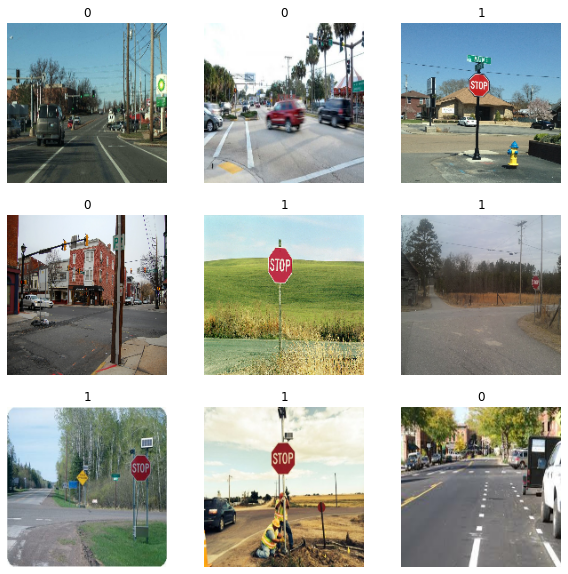

In [3]:
# Visualize the data.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [4]:
# Using image data augmentation.
data_augmentation = keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

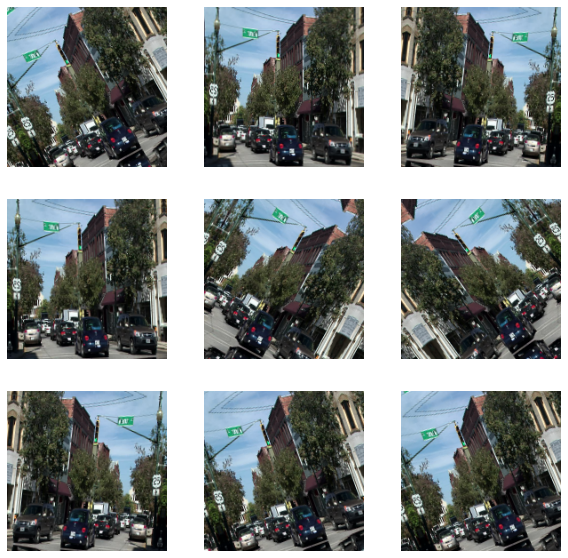

In [5]:
# Plot augmented set.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=image_size + (3,)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    return model


model = createModel()
keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [28]:
epochs = 50

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/50


NotImplementedError: in user code:

    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:394 call
        outputs = layer(inputs, **kwargs)
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\keras\layers\preprocessing\image_preprocessing.py:827 call
        output = control_flow_util.smart_cond(training, random_rotated_inputs,
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\keras\utils\control_flow_util.py:109 smart_cond
        return smart_module.smart_cond(
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\framework\smart_cond.py:54 smart_cond
        return true_fn()
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\keras\layers\preprocessing\image_preprocessing.py:822 random_rotated_inputs
        get_rotation_matrix(angles, img_hd, img_wd),
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\keras\layers\preprocessing\image_preprocessing.py:729 get_rotation_matrix
        array_ops.zeros((num_angles, 2), dtypes.float32),
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py:2911 wrapped
        tensor = fun(*args, **kwargs)
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py:2960 zeros
        output = _constant_if_small(zero, shape, dtype, name)
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py:2896 _constant_if_small
        if np.prod(shape) < 1000:
    <__array_function__ internals>:5 prod
        
    C:\Users\Eirwy\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3051 prod
        return _wrapreduction(a, np.multiply, 'prod', axis, dtype, out,
    C:\Users\Eirwy\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86 _wrapreduction
        return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
    C:\Users\Eirwy\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:867 __array__
        raise NotImplementedError(

    NotImplementedError: Cannot convert a symbolic Tensor (sequential_5/random_rotation_1/rotation_matrix/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported


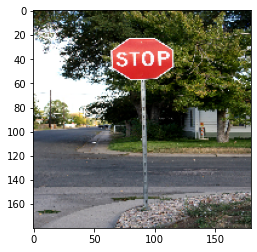

In [23]:
img = keras.preprocessing.image.load_img(
    "R.jfif", target_size=image_size
)
plt.imshow(img)

In [24]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent Not-Stop and %.2f percent Stop."
    % (100 * (1 - score), 100 * score)
)

This image is 0.00 percent Not-Stop and 100.00 percent Stop.


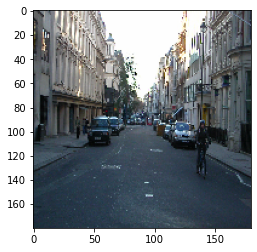

In [25]:
img = keras.preprocessing.image.load_img(
    "test_no_stop.jfif", target_size=image_size
)
plt.imshow(img)

In [26]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent Not-Stop and %.2f percent Stop."
    % (100 * (1 - score), 100 * score)
)

This image is 98.14 percent Not-Stop and 1.86 percent Stop.
